In [2]:
import numpy as np

In [3]:
def generate_datasets(num_samples=100,image_shape=(256,256),num_objects=10):
  images=np.zeros((num_samples,*image_shape,1),dtype=np.float32)
  masks=np.zeros((num_samples,*image_shape,1),dtype=np.float32)
  for i in range(num_samples):
    for _ in range(num_objects):
      obj_width=np.random.randint(10,50)
      obj_height=np.random.randint(10,50)
      x=np.random.randint(0,image_shape[0]-obj_width)
      y=np.random.randint(0,image_shape[1]-obj_height)
      images[i,x:x+obj_width,y:y+obj_height,0]=1.0
      masks[i,x:x+obj_width,y:y+obj_height,0]=1.0
  return images,masks

In [4]:
X,y=generate_datasets()

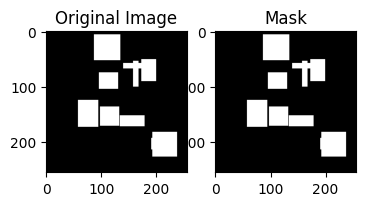

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(X[0],cmap='gray')
plt.subplot(1,2,2)
plt.title("Mask")
plt.imshow(y[0],cmap='gray')

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,Dropout,Conv2DTranspose,concatenate
from tensorflow.keras.models import Model
def u_net(input_shape=(256,256,1)):
  #Encoders
  input = Input(input_shape)
  conv1=Conv2D(32,3,activation='relu',padding='same')(input)
  conv1=Conv2D(32,3,activation='relu',padding='same')(conv1)
  pool1=MaxPooling2D(pool_size=(2,2))(conv1)

  conv2=Conv2D(64,3,activation='relu',padding='same')(pool1)
  conv2=Conv2D(64,3,activation='relu',padding='same')(conv2)
  pool2=MaxPooling2D(pool_size=(2,2))(conv2)

  conv3=Conv2D(128,3,activation='relu',padding='same')(pool2)
  conv3=Conv2D(128,3,activation='relu',padding='same')(conv3)

  #decoders
  up4=concatenate([Conv2DTranspose(64,(2,2),strides=(2,2),padding='same')(conv3),conv2],axis=3)
  conv4=Conv2D(64,3,activation='relu',padding='same')(up4)
  conv4=Conv2D(64,3,activation='relu',padding='same')(conv4)

  up5=concatenate([Conv2DTranspose(32,(2,2),strides=(2,2),padding='same')(conv4),conv1],axis=3)
  conv5=Conv2D(32,3,activation='relu',padding='same')(up5)
  conv5=Conv2D(32,3,activation='relu',padding='same')(conv5)

  output=Conv2D(1,1,activation='sigmoid')(conv5)

  model=Model(inputs=input,outputs=output)
  return model


In [12]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)

model=u_net()

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(xtrain,ytrain,epochs=10,batch_size=16)

Epoch 1/10
5/5 [==============================] - 110s 21s/step - loss: 0.6735 - accuracy: 0.8769
Epoch 2/10
5/5 [==============================] - 103s 21s/step - loss: 0.5747 - accuracy: 0.9595
Epoch 3/10
5/5 [==============================] - 104s 21s/step - loss: 0.5743 - accuracy: 0.9506
Epoch 4/10
5/5 [==============================] - 101s 20s/step - loss: 0.4654 - accuracy: 0.9571
Epoch 5/10
5/5 [==============================] - 106s 21s/step - loss: 0.2082 - accuracy: 0.9679
Epoch 6/10
5/5 [==============================] - 110s 21s/step - loss: 0.0301 - accuracy: 0.9978
Epoch 7/10
5/5 [==============================] - 110s 23s/step - loss: 0.0193 - accuracy: 0.9939
Epoch 8/10
5/5 [==============================] - 144s 29s/step - loss: 0.0129 - accuracy: 0.9962
Epoch 9/10
5/5 [==============================] - 110s 20s/step - loss: 0.0133 - accuracy: 0.9952
Epoch 10/10
5/5 [==============================] - 103s 20s/step - loss: 0.0113 - accuracy: 0.9965


In [13]:
pred=model.predict(xtest)

1/1 [==============================] - 7s 7s/step


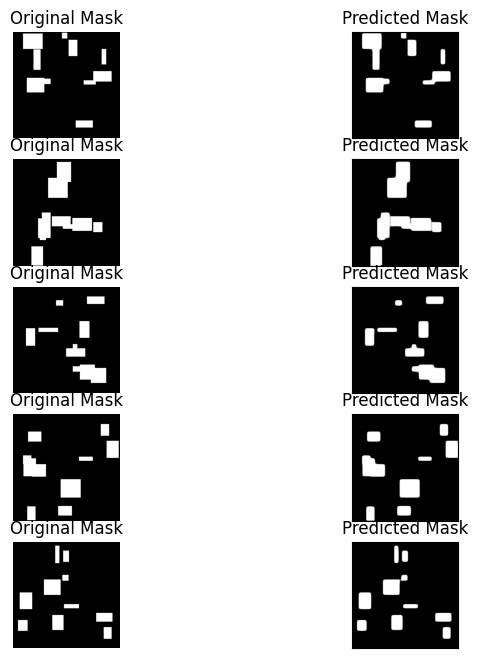

In [15]:
j=1
plt.figure(figsize=(8,8))
for i in range(5):
  plt.subplot(5,2,j)
  plt.title("Original Mask")
  plt.imshow(ytest[i],cmap='gray')
  plt.axis('off')
  j+=1
  plt.subplot(5,2,j)
  plt.title("Predicted Mask")
  plt.imshow(pred[i],cmap='gray')
  j+=1
  plt.xticks([])
  plt.yticks([])